Varianza explicada por componente: [0.28478705 0.16174062]


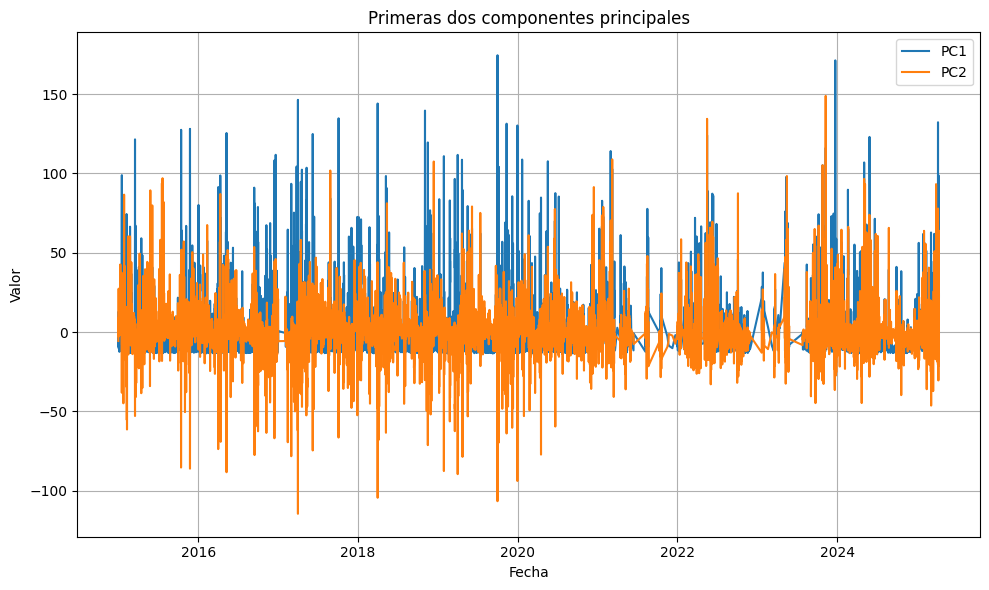

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Cargar datos desde CSV
df = pd.read_csv(
    r"E:\074-Diego Rengifo 2025\datasience\precipitacion\db\MSWEP-GloH2O\csv-3h\precipitacion tum radius(1.82011, -78.72871).csv",
    parse_dates=['dates']
)

# 2. Establecer la columna de fechas como índice
df.set_index('dates', inplace=True)
full_index = df.index

# 3. Eliminar NaNs para PCA
df_clean = df.dropna()
clean_index = df_clean.index

# 4. Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# 5. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por componente:", pca.explained_variance_ratio_)

# 6. Visualizar componentes principales
plt.figure(figsize=(10, 6))
plt.plot(clean_index, X_pca[:, 0], label='PC1')
plt.plot(clean_index, X_pca[:, 1], label='PC2')
plt.title('Primeras dos componentes principales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 7. Reconstrucción inversa (desde componentes)
X_reconstructed_scaled = pca.inverse_transform(X_pca)
X_reconstructed = scaler.inverse_transform(X_reconstructed_scaled)

# 8. Crear DataFrame reconstruido con NaNs en su lugar original
df_reconstruida = pd.DataFrame(index=full_index, columns=df.columns)
df_reconstruida.loc[clean_index] = X_reconstructed


In [8]:
df_reconstruida

,lat_3.25_lon_-80.15,lat_3.25_lon_-80.05,lat_3.25_lon_-79.95,lat_3.25_lon_-79.85,lat_3.25_lon_-79.75,lat_3.25_lon_-79.65,lat_3.25_lon_-79.55,lat_3.25_lon_-79.45,lat_3.25_lon_-79.35,lat_3.25_lon_-79.25,...,lat_0.35_lon_-78.15,lat_0.35_lon_-78.05,lat_0.35_lon_-77.95,lat_0.35_lon_-77.85,lat_0.35_lon_-77.75,lat_0.35_lon_-77.65,lat_0.35_lon_-77.55,lat_0.35_lon_-77.45,lat_0.35_lon_-77.35,lat_0.35_lon_-77.25
dates,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.39554,0.370089,0.349649,0.335035,0.308265,0.322216,0.346362,0.317701,0.33729,0.338451,...,0.396576,0.406292,0.406397,0.526915,0.606894,0.627165,0.837818,1.049228,1.13411,1.216114
2015-01-01 03:00:00,0.508922,0.508323,0.492248,0.507986,0.499129,0.520077,0.571365,0.551684,0.58858,0.596716,...,0.223227,0.228526,0.230937,0.314855,0.365039,0.371603,0.526834,0.673218,0.696525,0.780971
2015-01-01 06:00:00,0.870156,0.91685,0.913903,1.001943,1.038842,1.079558,1.218324,1.229291,1.325205,1.362828,...,0.186892,0.189621,0.192197,0.276116,0.322908,0.332156,0.48283,0.621618,0.664197,0.75139
2015-01-01 09:00:00,0.771262,0.804852,0.798307,0.866433,0.89075,0.926041,1.040864,1.04345,1.123227,1.152813,...,0.199375,0.202865,0.20536,0.289852,0.338023,0.346764,0.49953,0.641379,0.679742,0.766157
2015-01-01 12:00:00,0.777092,0.819777,0.813648,0.889316,0.917328,0.953598,1.06957,1.072119,1.151834,1.179999,...,0.063964,0.064406,0.06878,0.1228,0.146998,0.14367,0.251412,0.340986,0.32336,0.411135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-10 03:00:00,3.487273,3.796139,3.886335,4.436634,4.776484,4.95405,5.729119,5.967271,6.500562,6.770131,...,1.225637,1.238777,1.224439,1.60263,1.85583,2.001484,2.553232,3.140624,3.866508,3.9609
2025-04-10 06:00:00,5.397195,5.997001,6.157607,7.121471,7.717753,8.00307,9.239369,9.636951,10.477311,10.89347,...,0.371878,0.356679,0.352424,0.581085,0.698971,0.799372,1.106434,1.397736,1.949229,2.064595
2025-04-10 09:00:00,6.892572,7.720873,7.936624,9.224826,10.022131,10.391867,11.989266,12.511628,13.592324,14.123097,...,-0.307938,-0.345577,-0.341779,-0.232763,-0.222837,-0.158887,-0.047192,0.00789,0.4181,0.549998


In [ ]:
print(len(df_region_cells))
df_region_cells.to_csv(f"precipitacion bbv radius({center_lat}, {center_lon}).csv", index=True, sep=',')